# HABERMAN SURVIVAL DATASET

In [37]:
#At first import required packages..
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
#Load haberman.csv into a pandas dataFrame.
haberman = pd.read_csv("haberman.csv")

Here we retreive the haberman dataset using pandas.read_csv method as dataset is a csv file..

In [9]:
# no.of data-points and features
print (haberman.shape)

(306, 4)


Here we will find out no.of points,features,coloumns,rows... in the given dataset..

In [27]:
# column names of our dataset
print (haberman.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [28]:
#We describe the databse to observe values like mean,std etc and plot dataset according to those values
haberman.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [29]:
#Here we check the datatypes of all features or coloumns to avoid confusion and gain clarity...  
haberman.dtypes

age       int64
year      int64
nodes     int64
status    int64
dtype: object

In [30]:
haberman['status'].value_counts()

1    225
2     81
Name: status, dtype: int64

In the above code we find no.of survivals and non-survivals those are denoted by 1 & 2...

# This is 2D scatter plot

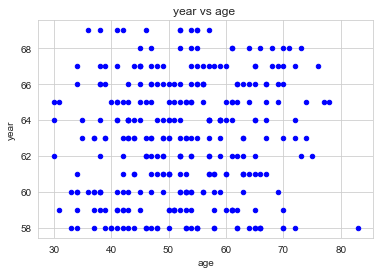

In [31]:
#2D scatter plot:
haberman.plot(kind='scatter', x='age', y='year',c='b') ;
plt.title('year vs age ')
plt.show()

    Here we can see that nothing is clear,the data-points are widely spread,but we can say that most of operations are done on people with age 40 to 70 approximately.so let's try with another features.. 

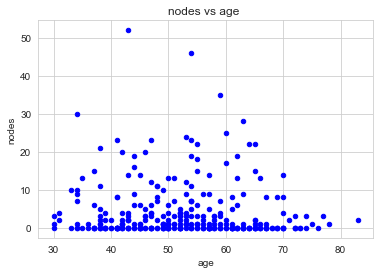

In [32]:
#2d scatter plot with nodes on y-axis and age on x-axis as features..
haberman.plot(kind='scatter', x='age', y='nodes',c='b') ;
plt.title('nodes vs age ')
plt.show()

   Here we observe that majority of data points are found at axial nodes=0 

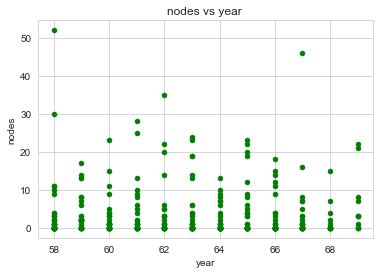

In [33]:
haberman.plot(kind='scatter', x='year', y='nodes',c='g') ;
plt.title('nodes vs year ')
plt.show()

  Here we can say that more number of operations are done between 1960-66.

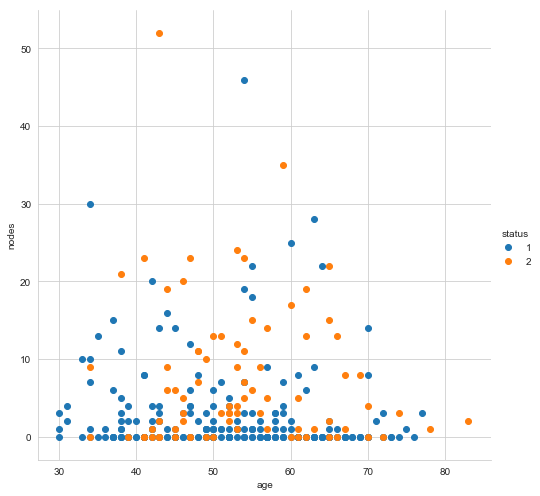

In [34]:
# 2D Scatter plot with color-coding for each survival types.
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="status", size=7) \
   .map(plt.scatter, "age", "nodes") \
   .add_legend();
plt.show()

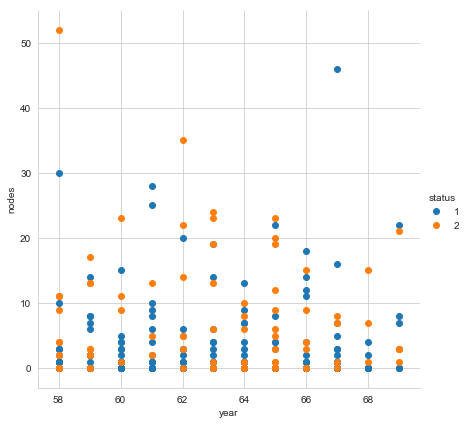

In [35]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="status", size=6) \
   .map(plt.scatter, "year", "nodes") \
   .add_legend();
plt.show()

# 3D SCATTER PLOT

#   pair plot 

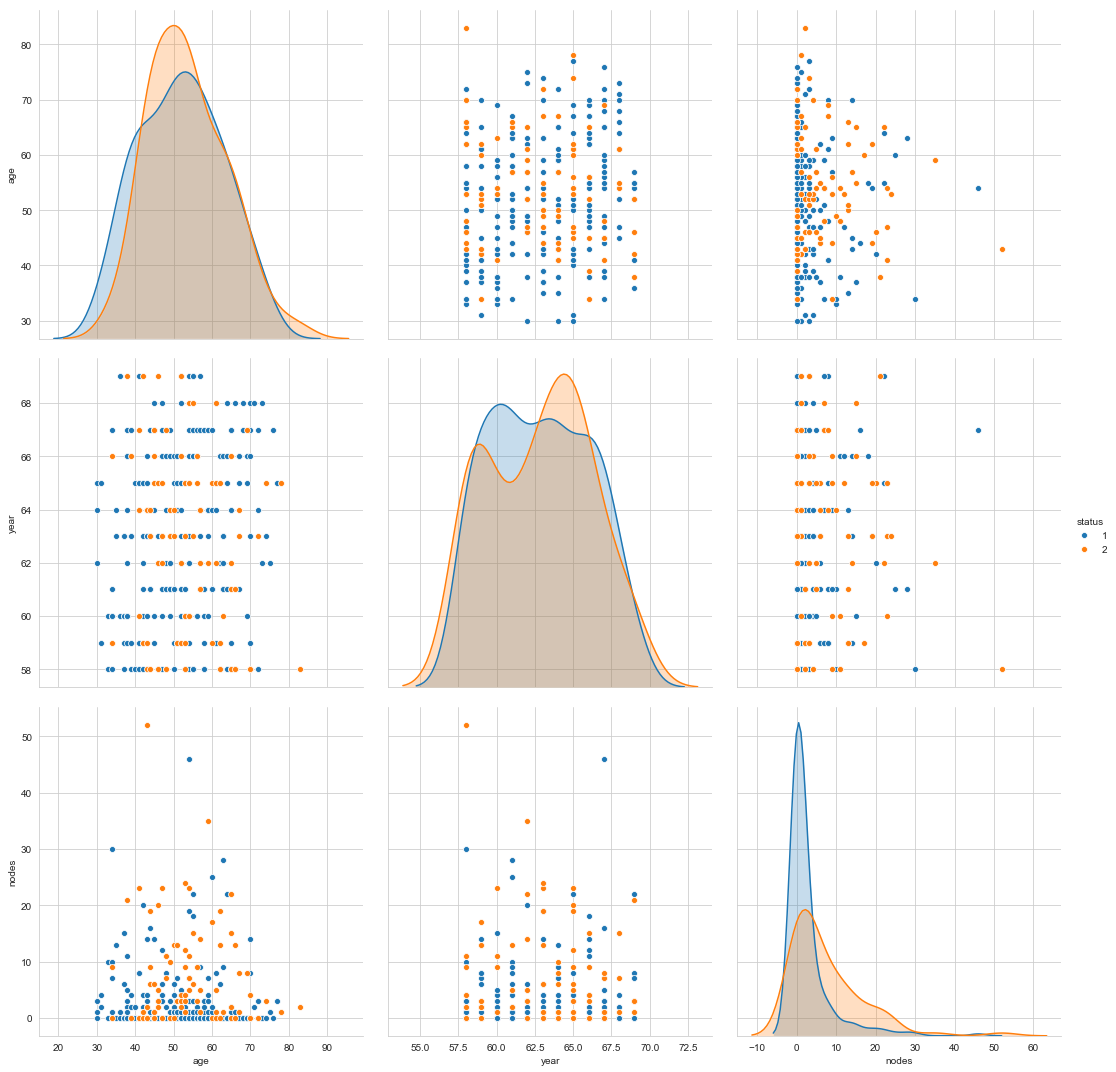

In [38]:
# pairwise scatter plot: Pair-Plot
#Here in the plot diagonal plots are called pdf's
plt.close()
sns.pairplot(haberman, hue="status", vars=["age", "year", "nodes"], size=5)
plt.show()

**Observations**
1. age and nodes are the most useful features to identify various flower types.
3. We could find-out "if-else" conditions to build a simple model to classify the survival types.

# Histogram,Pdf,Cdf

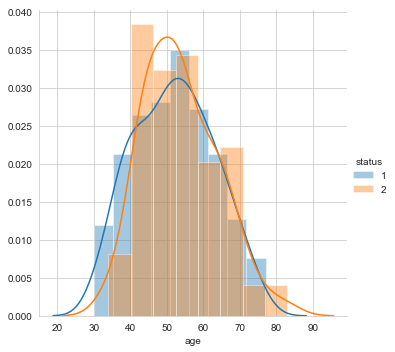

In [39]:
sns.FacetGrid(haberman, hue="status", size=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.show();

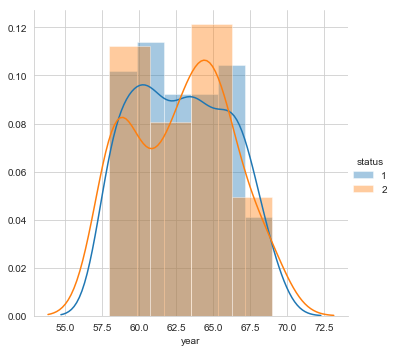

In [41]:
sns.FacetGrid(haberman, hue="status", size=5) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.show();

Here we can observe that Large no.of patients are dead whose operation is done between year 1958-67

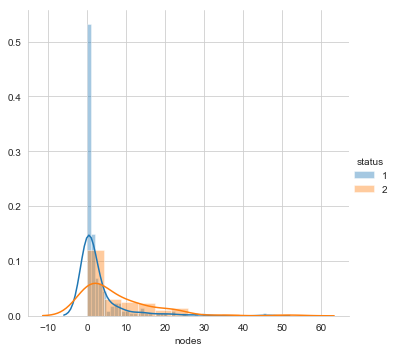

In [70]:
sns.FacetGrid(haberman, hue="status", size=5) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.show();

we can observe that patients with axial nodes as 0 are more likely to be survived...

In [42]:
# Get the data elements having Survival status is 1
surv = haberman[haberman["status"] == 1]
# Get the data elements having Survival status is 2
non_surv = haberman[haberman["status"] == 2]

[0.43478261 0.08115942 0.02898551 0.0173913  0.01449275 0.02028986
 0.0057971  0.0057971  0.00289855 0.0115942  0.00289855 0.00289855
 0.00289855 0.00289855 0.0057971  0.         0.00289855 0.
 0.00289855 0.00289855 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.00289855]
[ 0.          1.53333333  3.06666667  4.6         6.13333333  7.66666667
  9.2        10.73333333 12.26666667 13.8        15.33333333 16.86666667
 18.4        19.93333333 21.46666667 23.         24.53333333 26.06666667
 27.6        29.13333333 30.66666667 32.2        33.73333333 35.26666667
 36.8        38.33333333 39.86666667 41.4        42.93333333 44.46666667
 46.        ]
[0.19230769 0.08547009 0.04985755 0.02136752 0.02849003 0.03561254
 0.02849003 0.02849003 0.02136752 0.00712251 0.01424501 0.00712251
 0.01424501 0.02849003 0.         0.         0.         0.
 0.         0.         0.00712251 0.         0.         0.
 0.         0.         0.         0.         0.  

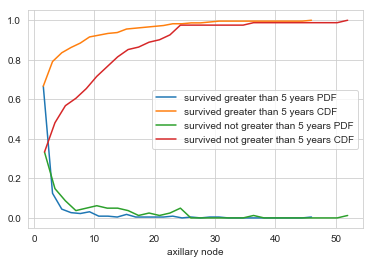

In [50]:
#Get the counts and bin edges of axillary nodes whose survival status is 1
#Reference for this code snippet is this link below..
#https://www.kaggle.com/ashteotia/eda-on-haberman-survival-dataset
cnts, bn_edgs = np.histogram(surv["nodes"], bins=30, density=True)
print (cnts)
print (bn_edgs)

#Get the counts and bin edges of axillary nodes whose survival status is 2
non_cnts, non_bn_edgs = np.histogram(non_surv["nodes"], bins=30, density=True)
print (non_cnts)
print (non_bn_edgs)

#PDF and CDF of survived
pdf_axilry_survd = cnts/sum(cnts)
cdf_axilry_survd = np.cumsum(pdf_axilry_survd)

#PDFand CDF of non survived
pdf_axilry_non_survd = non_cnts/sum(non_cnts)
cdf_axilry_non_survd = np.cumsum(pdf_axilry_non_survd)

# Plot survived and non survived PDF, CDF in a single plot
plt.plot(bn_edgs[1:], pdf_axilry_survd)
plt.plot(bn_edgs[1:], cdf_axilry_survd)
plt.plot(non_bn_edgs[1:], pdf_axilry_non_survd)
plt.plot(non_bn_edgs[1:], cdf_axilry_non_survd)
#plt.xticks(np.linspace(0,50,13))
plt.xlabel("axillary node")
plt.legend(["survived greater than 5 years PDF", "survived greater than 5 years CDF", "survived not greater than 5 years PDF", "survived not greater than 5 years CDF" ])
plt.show()

In [44]:
# statistical description of the elements in data whose Survival status is 1
Non_Survived = haberman[haberman["status"] == 1]
print ("Summary of patients who are survived more than 5 yeras")
Non_Survived.describe()

Summary of patients who are survived more than 5 yeras


,age,year,nodes,status
count,225.000000,225.000000,225.000000,225.0
mean,52.017778,62.862222,2.791111,1.0
std,11.012154,3.222915,5.870318,0.0
min,30.000000,58.000000,0.000000,1.0
25%,43.000000,60.000000,0.000000,1.0
50%,52.000000,63.000000,0.000000,1.0
75%,60.000000,66.000000,3.000000,1.0
max,77.000000,69.000000,46.000000,1.0


In [45]:
# statistical description of the elements in data whose Survival status is 2
Non_Survived = haberman[haberman["status"] == 2]
print ("Summary of patients who are not survived more than 5 yeras")
Non_Survived.describe()

Summary of patients who are not survived more than 5 yeras


,age,year,nodes,status
count,81.000000,81.000000,81.000000,81.0
mean,53.679012,62.827160,7.456790,2.0
std,10.167137,3.342118,9.185654,0.0
min,34.000000,58.000000,0.000000,2.0
25%,46.000000,59.000000,1.000000,2.0
50%,53.000000,63.000000,4.000000,2.0
75%,61.000000,65.000000,11.000000,2.0
max,83.000000,69.000000,52.000000,2.0


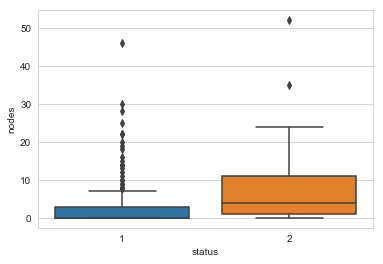

In [46]:
sns.boxplot(data=haberman, x="status", y="nodes")
plt.show()

    Using this boxplot we can consider that as no.of nodes increases it is more likely to die..

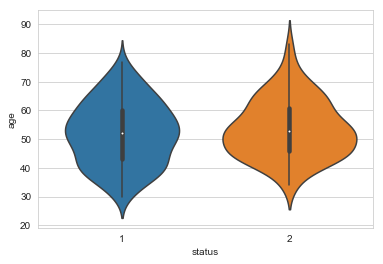

In [47]:
sns.violinplot(data=haberman, x="status", y="age")
plt.show()

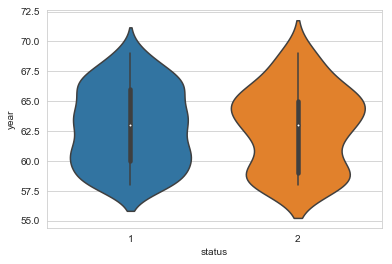

In [48]:
sns.violinplot(data=haberman, x="status", y="year")
plt.show()

It is hard to predict through above 2 violin plots..

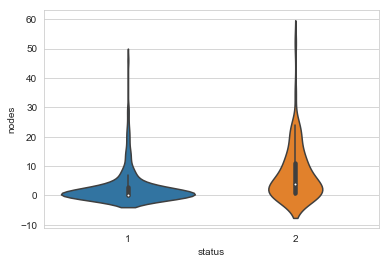

In [49]:
sns.violinplot(data=haberman, x="status", y="nodes")
plt.show()

# FINAL CONCLUSION